<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [5]:
url_confirmed_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url_deaths_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
url_confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


# Import urls as dataframes

confirmed_dat = pd.read_csv(url_confirmed_global)
deaths_dat = pd.read_csv(url_deaths_global)


deaths_dat.set_index("Country/Region", inplace = True)
deaths_dat = deaths_dat.loc[~deaths_dat.index.duplicated(keep='first')]


deaths_set = deaths_dat.iloc[:, 4:]

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=1)
Construct fuzzy simplicial set
Thu Apr  9 22:07:54 2020 Finding Nearest Neighbors
Thu Apr  9 22:07:54 2020 Finished Nearest Neighbor Search
Thu Apr  9 22:08:01 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Apr  9 22:0

In [39]:
from numpy.fft import rfft
from umap import UMAP


cop = deaths_set.copy()
maxes = np.amax(deaths_set,axis = 1)
for ind in deaths_set.index:
    if maxes[ind] != 0:
        cop.loc[ind, :] /= maxes[ind]

pre_dat = abs(rfft(cop))
pre_dat = cop

emb = UMAP(verbose = 1).fit_transform(pre_dat)
embed = pd.DataFrame(emb).set_index(deaths_set.index)

embed.to_pickle("embedded.dat")

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=1)
Construct fuzzy simplicial set
Thu Apr  9 22:25:25 2020 Finding Nearest Neighbors
Thu Apr  9 22:25:25 2020 Finished Nearest Neighbor Search
Thu Apr  9 22:25:25 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Apr  9 22:2

<IPython.core.display.Javascript object>


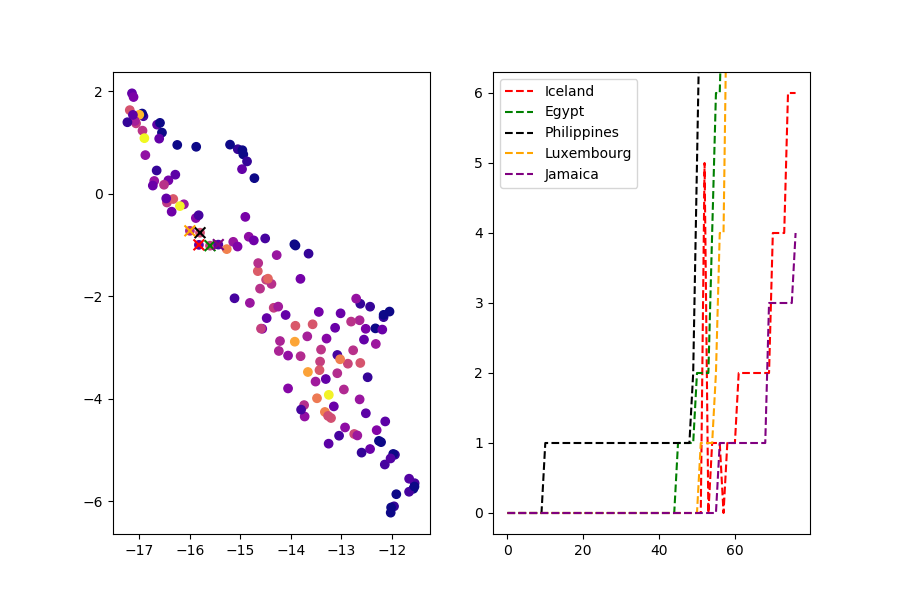

/home/johann/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
%run interactive_plot.py